- https://velog.io/@songjeongwoo/Seaborn%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B0%81%ED%99%94

- https://colab.research.google.com/github/datascienceschool/book/blob/master/ds/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb

1. 데이터셋 확인 : null data를 확인하고 수정  
2. 탐색적 데이터 분석(exploratory data analysis) : 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인, 여러 시각화 툴을 사용하여 insight를 얻는다.  
3. feature engineering : 모델을 세우기 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering한다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 한다.  
4. model 만들기 : sklearn을 사용해 모델을 만든다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있다. 물론 딥러닝을 위해 tensorflow, pytorch등을 사용할 수도 있다.
5. 모델학습 및 예측 : trainset을 가지고 모델을 학습시킨 후, testset을 가지고 prediction한다.  
6. 모델 평가 : 예측 성능이 원하는 수준인지 판단한다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라진다. 학습된 모델이 어떤 것을 학습하였는지 확인한다.

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib의 기본 scheme말고 seaborn scheme을 세팅하고,
#일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_sacle을 사용하면 편하다
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/var/folders/qg/syyr2wld1c5gxxwxs5pkpty80000gn/T/ipykernel_95907/3939165356.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


##1.Dataset확인
- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화 되어 있으며, 많이 쓰이는 라이브러리 : pandas
- pandas를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있다.
- 캐글에서 데이터셋은 보통 train, test set으로 나뉘어 있다.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#df_train = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
#df_test = pd.read_csv('/content/drive/MyDrive/titanic_test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_train = pd.read_csv('./titanic_train.csv')
df_test = pd.read_csv('./titanic_test.csv')

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Feature : Pclass, Age, SibSp, Parch, Fare
- target label : Survived

- describe( ) : 각 featurer가 가진 통계치들을 반환

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- PassenserID 숫자와 다른, null data가 존재하는 열(feature)가 있는 것 같다.
- 이를 좀 더 보기 편하도록 그래프로 시각화

###1.1 Null data check

In [13]:
for col in df_train.columns:
  msg = 'column:{:>10}\t Percent of NaN value:{:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

#shape[0] 은 행의 개수
#shape[1] 은 열의 개수
#100*(df_train[col].isnull().sum() / df_train[col].shape[0]) : %로 표현하기 위해 사용된 식

column:PassengerId	 Percent of NaN value:0.00%
column:  Survived	 Percent of NaN value:0.00%
column:    Pclass	 Percent of NaN value:0.00%
column:      Name	 Percent of NaN value:0.00%
column:       Sex	 Percent of NaN value:0.00%
column:       Age	 Percent of NaN value:19.87%
column:     SibSp	 Percent of NaN value:0.00%
column:     Parch	 Percent of NaN value:0.00%
column:    Ticket	 Percent of NaN value:0.00%
column:      Fare	 Percent of NaN value:0.00%
column:     Cabin	 Percent of NaN value:77.10%
column:  Embarked	 Percent of NaN value:0.22%


In [14]:
for col in df_test.columns:
  msg = 'column:{:>10}\t Percent of NaN value:{:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

column:PassengerId	 Percent of NaN value:0.00%
column:    Pclass	 Percent of NaN value:0.00%
column:      Name	 Percent of NaN value:0.00%
column:       Sex	 Percent of NaN value:0.00%
column:       Age	 Percent of NaN value:20.57%
column:     SibSp	 Percent of NaN value:0.00%
column:     Parch	 Percent of NaN value:0.00%
column:    Ticket	 Percent of NaN value:0.00%
column:      Fare	 Percent of NaN value:0.24%
column:     Cabin	 Percent of NaN value:78.23%
column:  Embarked	 Percent of NaN value:0.00%


- Train, Test set에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재
- MANO 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있다.

<AxesSubplot: >

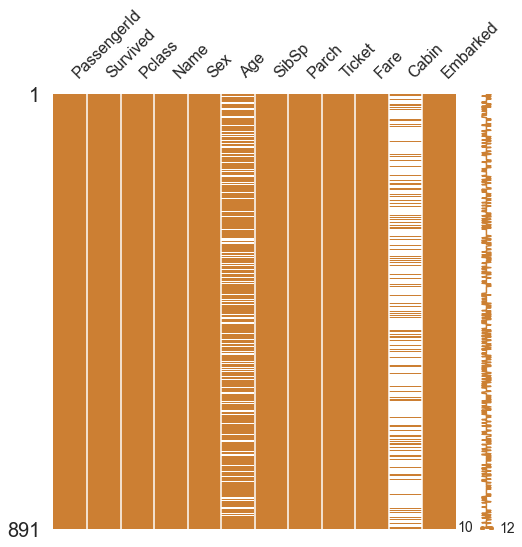

In [15]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8),color=(0.8,0.5,0.2))

<AxesSubplot: >

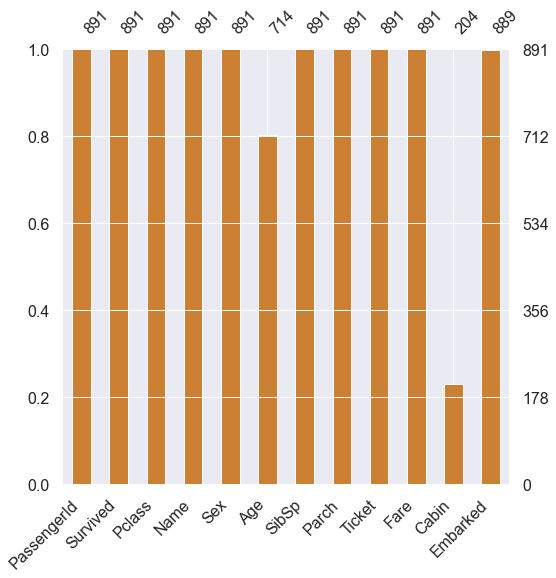

In [16]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot: >

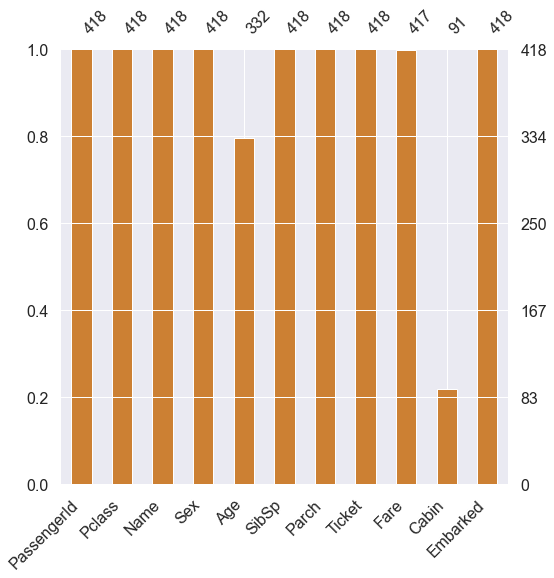

In [17]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

###1.2 Target label 확인
- target label이 어떤 distribution을 가지고 있는지 확인해야 한다.
- binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가방법이 달라 질 수 있다.

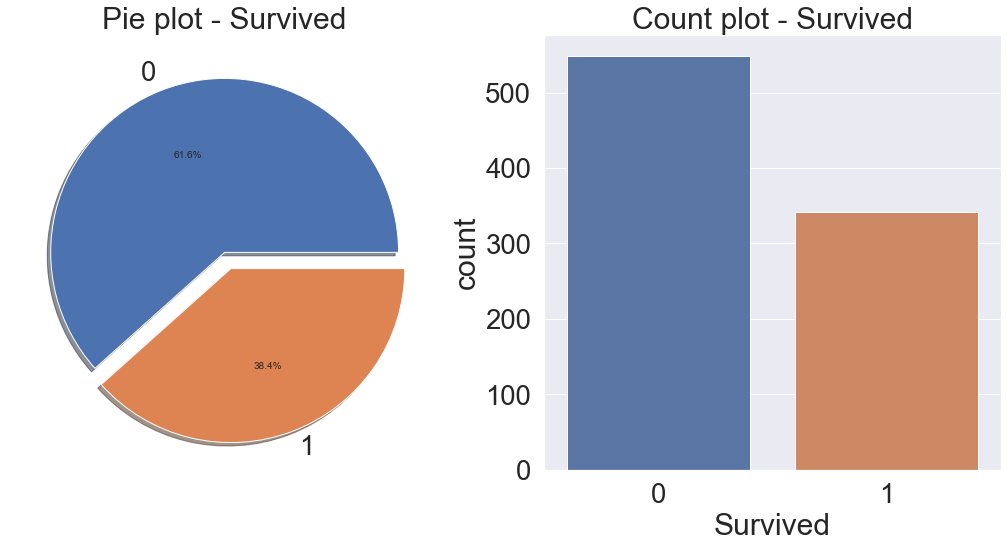

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
#countplot 함수 : 집계를 할 필요가 없다. - 그래프에서 바로 해줌.
sns.countplot(x='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 생존자보다 죽은 사람이 더 많음
- 38.4%가 살아 남았다.
- target label의 분포가 제법 균일하다.
- 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 된다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 된다.

- plt.subplots 로 그래프 공간과 사이즈 확보 >> 1행2열, 사이즈는 가로 세로 각각 15,8로 확보

- value_counts 한 결과를 plot.pie를 통해 파이차트로 시각화 > 파이차트는 천제를 이루는 각 구성요소가 전체 중 얼마만큼의 ㅣ중으로 되어 있는지 파악하기 좋다. 

- plot.pie 옵션 :: explode --> 파이조각이 돌출되는 크기 -- > [0,0.1] 은 2번째 파이 조각만 0.1만큼 돌출되게 함 

                            :: autopct --> 파이 조각의 전체 대비 백분율을 소수점 1자리 까지 %로 표기하겠다. 

                            :: shadow --> 파이 차트의 그림자 효과 유무 

                            :: labels --> 파이 조각의 라벨 

- ax[n]을 통해 어느 위치에 그릴지 정해준다. 

- set_title 은 제목 

- set_ylabel 은 y축 이름 

- sns.countplot :: 막대그래프 / 알고자 하는 컬럼을 X축에 적으면 된다. 

##2. Exploratory data analysis
- 시각화 라이브러리 : matplotlib, seaborn, plotly 등. 특정 목적에 맞는 소스 코드를 정리해 두어 필요할 때 마다 참고하자.

###2.1 Pclass
- Pclass 는 ordinal, 서수형 데이터, 카테고리이면서, 순서가 있는 데이터 타입
- 먼저 Pclass 에 따른 생존률의 차이를 살핀다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있다. 또한 pivot 이라는 메소드도 있다.
- 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶
다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나온다.
- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 된다.

In [19]:
#as_index = False : 인덱스 표시 O
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas 의 crosstab 을 사용하면 좀 더 위 과정을 좀 더 수월하게 볼 수 있다.
- crosstab : 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용한다.
- 파라미터 
  - index : y축에 올 값
  - columns : x축에 올 값

- https://freedata.tistory.com/60

- pd.crosstab(index, # values to group by in the rows columns, # values to group by in the columns rownames, colnames , margins, # adding row / column margins normalize # Normalizing by dividing all values by the sum of values )  
#### 교차표 
- margins = True로 해주면 열과 행의 All 합계를 표시해준다. 
- .style.background_gradient(cmap = ' ' ) :: 값을 그라데이션으로 표현해줌 (기능 보다는 시각능력?)
- Pclass 1-3 등급 비율을 보면 1-2가 약 200명, 3등급이 500명으로 3등급이 압도적으로 많다.
- 하지만 생존자의 비율을 보면 1~2등급은 탑승객 대비 각각 70% , 50% 가 살아남았지만, 3등급의 탑승객은 20% 이하의 생존율을 가지고 있다. 
- 등급이 높을수록 (1에 가까울수록) 구조하는데 우선순위가 부여된 것으로 짐작할 수 있다. 

In [21]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean() 을 하게 되면, 각 클래스별 생존률을 얻을 수 있다.

<AxesSubplot: xlabel='Pclass'>

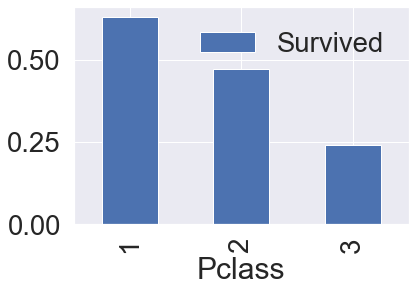

In [22]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- Pclass 가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있다.
- seaborn 의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인해볼 수 있다.

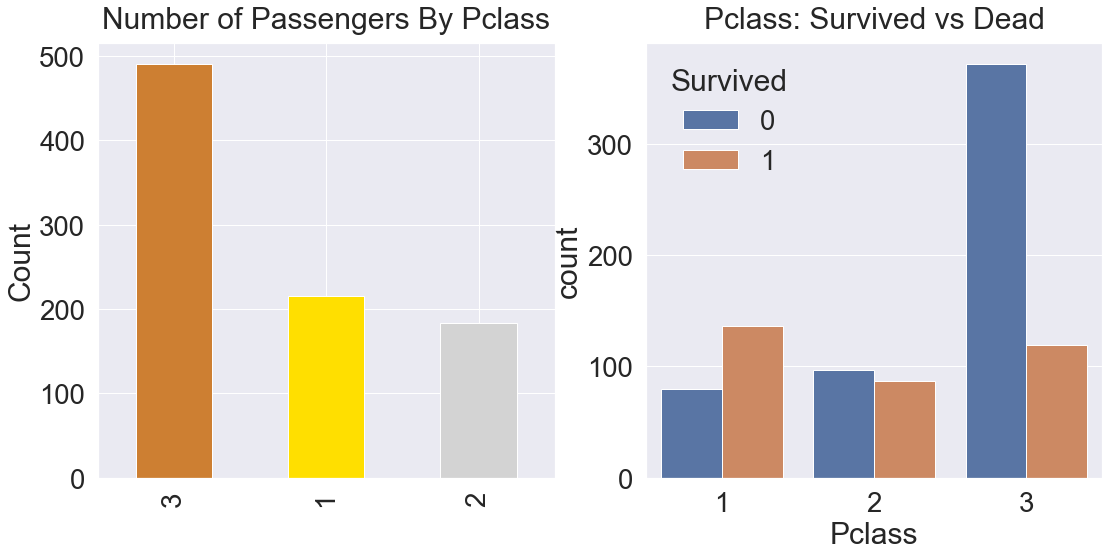

In [23]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
#hue : 두개 이상을 비교할 때, 비교할 대상
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있다. Pclass 1, 2, 3 순서대로 63%, 48%, 25%이다.
- 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있다.

###2.2 Sex
- 성별로 생존률이 어떻게 달라지는 지 확인

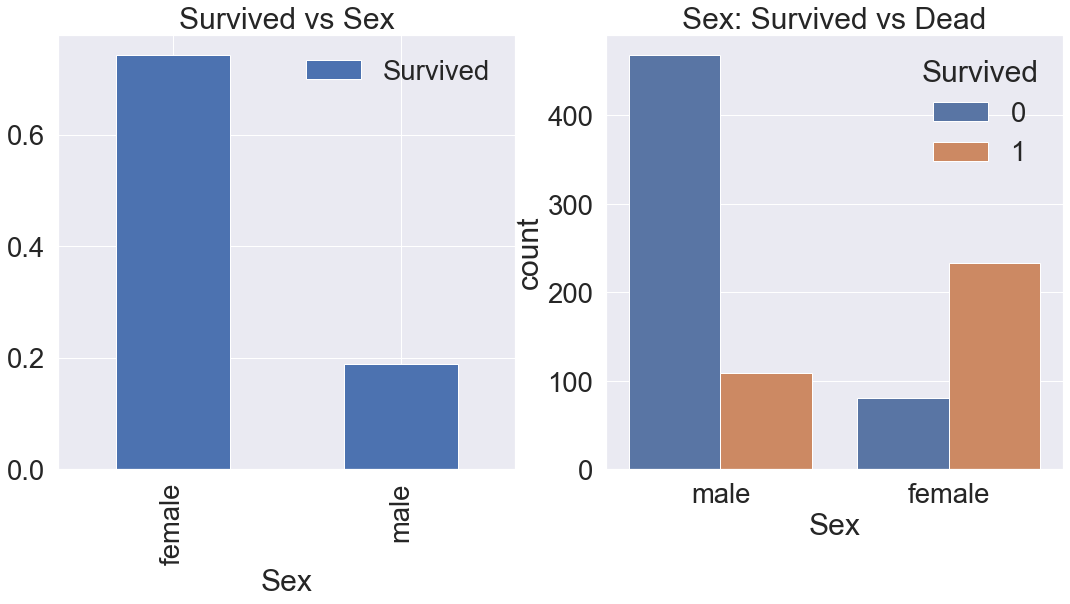

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- data를 Sex와 Survived로 그룹화를 한 후, Survived의 빈도수를 가져옴 

- ax[0] :: data의 Sex와 Survived만 뽑아 낸 후, Sex로 그룹화를 시키고 평균을 구함 > plot.bar로 시각화

         :: 남성 안에서 생존자의 비율 / 여성 안에서 생존자의 비율을 확인하기 위해서 

         :: 즉, P(생존 | 남성) , P(생존 | 여성) 을 의미한다고 생각한다. 

- ax[1] :: sns.countplot 의 X축은 Sex 이고 / hue = 'Survived' --> Survived를 기준으로 데이터를 쪼갠다.

         :: 남성안에서도 Survived가 0,1 로 쪼개고 여성안에서도 쪼개진다. 

>> 여성은 70%이상 , 남성은 20% 이하의 생존율을 가진다. >> 여성을 우선 구조했음을 짐작할 수 있다. 

>> 성별(Sex)이 Survived를 분류하는데 중요한 영향을 주는 변수라고 생각 

In [25]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다.

###2.3 Both Sex and Pclass
- Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인
- seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

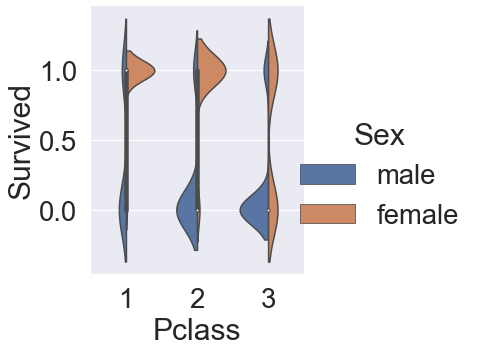

In [47]:
sns.catplot(data=df_train, x='Pclass', y='Survived', hue='Sex', kind="violin", split=True)

- 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있다.
- 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높다.


<AxesSubplot: xlabel='Sex', ylabel='Survived'>

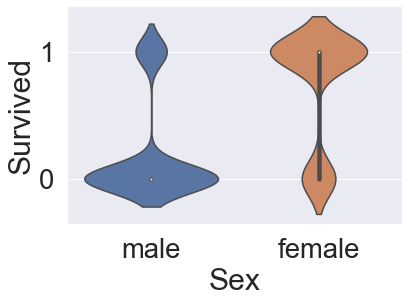

In [46]:
sns.violinplot(x='Sex', y='Survived', col='Pclass',data=df_train, kind="violin", split=True)

###2.4 Age

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 histogram

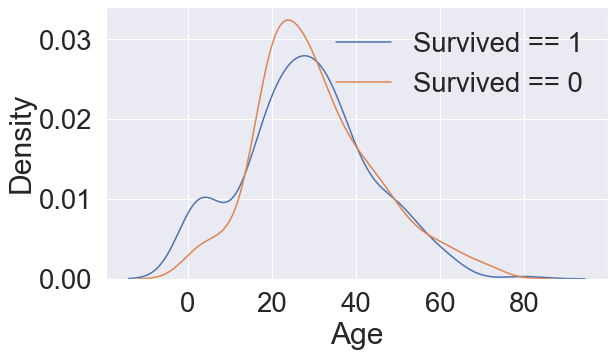

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많은 것을 볼 수 있다.

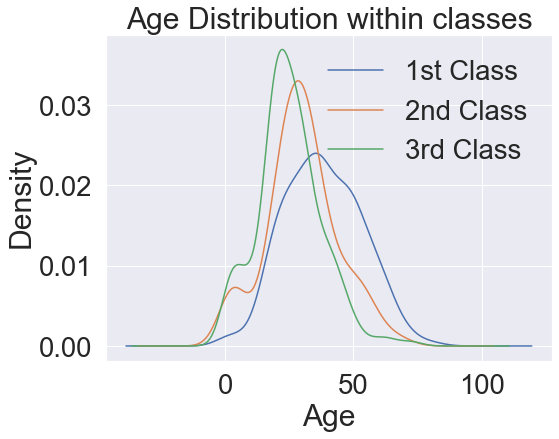

In [49]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Class 가 높을 수록 나이 많은 사람의 비중이 커짐
- 나이대가 변하면서 생존률이 어떻게 되는가?- 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 보자

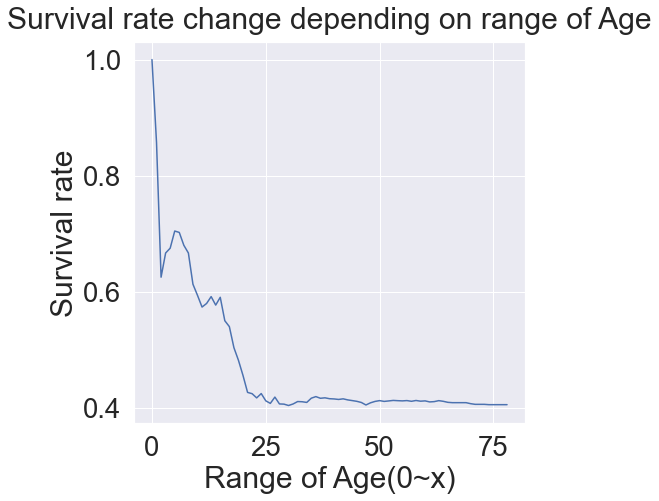

In [50]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 확실히 높은것을 확인할 수 있다.
- 나이가 중요한 feature 로 쓰일 수 있음을 확인

###2.5 Pclass, Sex, Age
- Sex, Pclass, Age, Survived 모두에 대해서 보기 위해 seaborn의 violinplot 사용
- x 축은 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 이다.

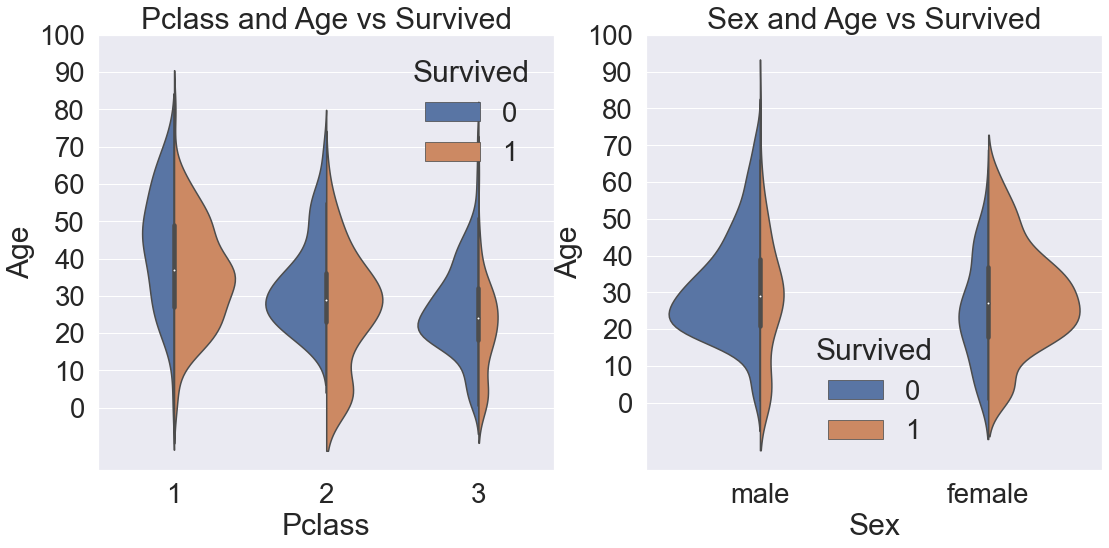

In [51]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=df_train, x="Pclass",y="Age", hue="Survived", scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot( data=df_train,x="Sex",y="Age", hue="Survived", scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프
- 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있다.
- 여성과 아이를 먼저 챙긴 것을 볼 수 있다.

###2.6 Embarked
- Embarked : 탑승한 항구

<AxesSubplot: xlabel='Embarked'>

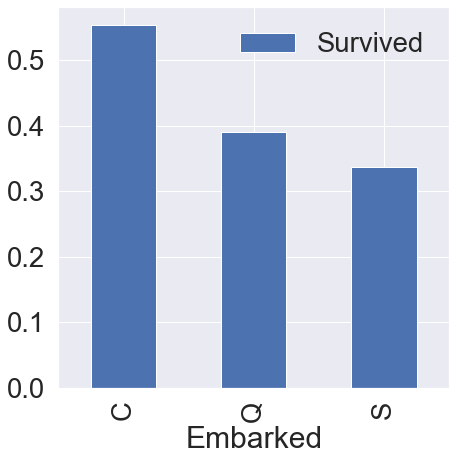

In [52]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

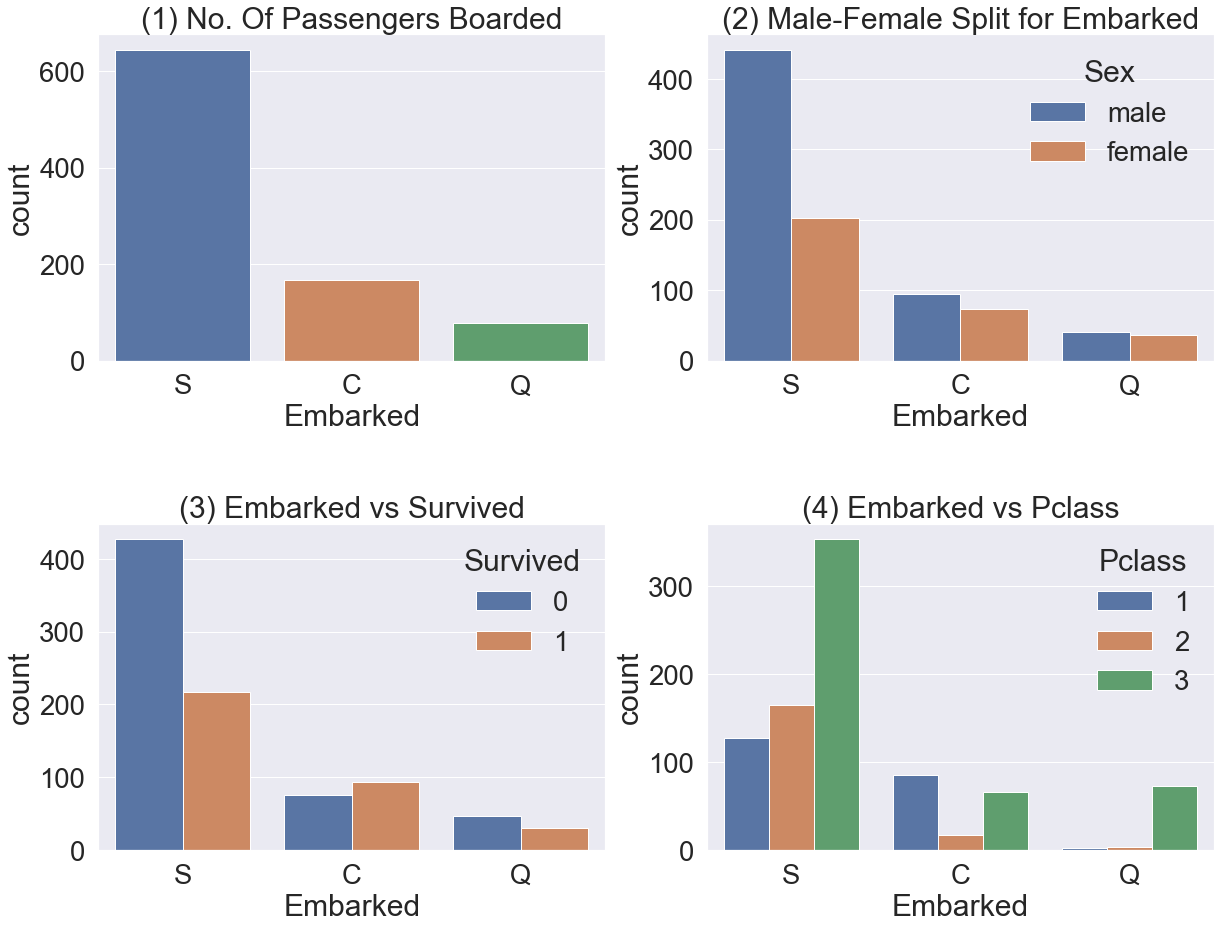

In [53]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했다.
- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
- Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있다.
- Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇다. S는 3rd class 가 많아서 생존확률이 낮게 나온다.

###2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [54]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더한다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더한다

In [55]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


- FamilySize와 생존의 관계

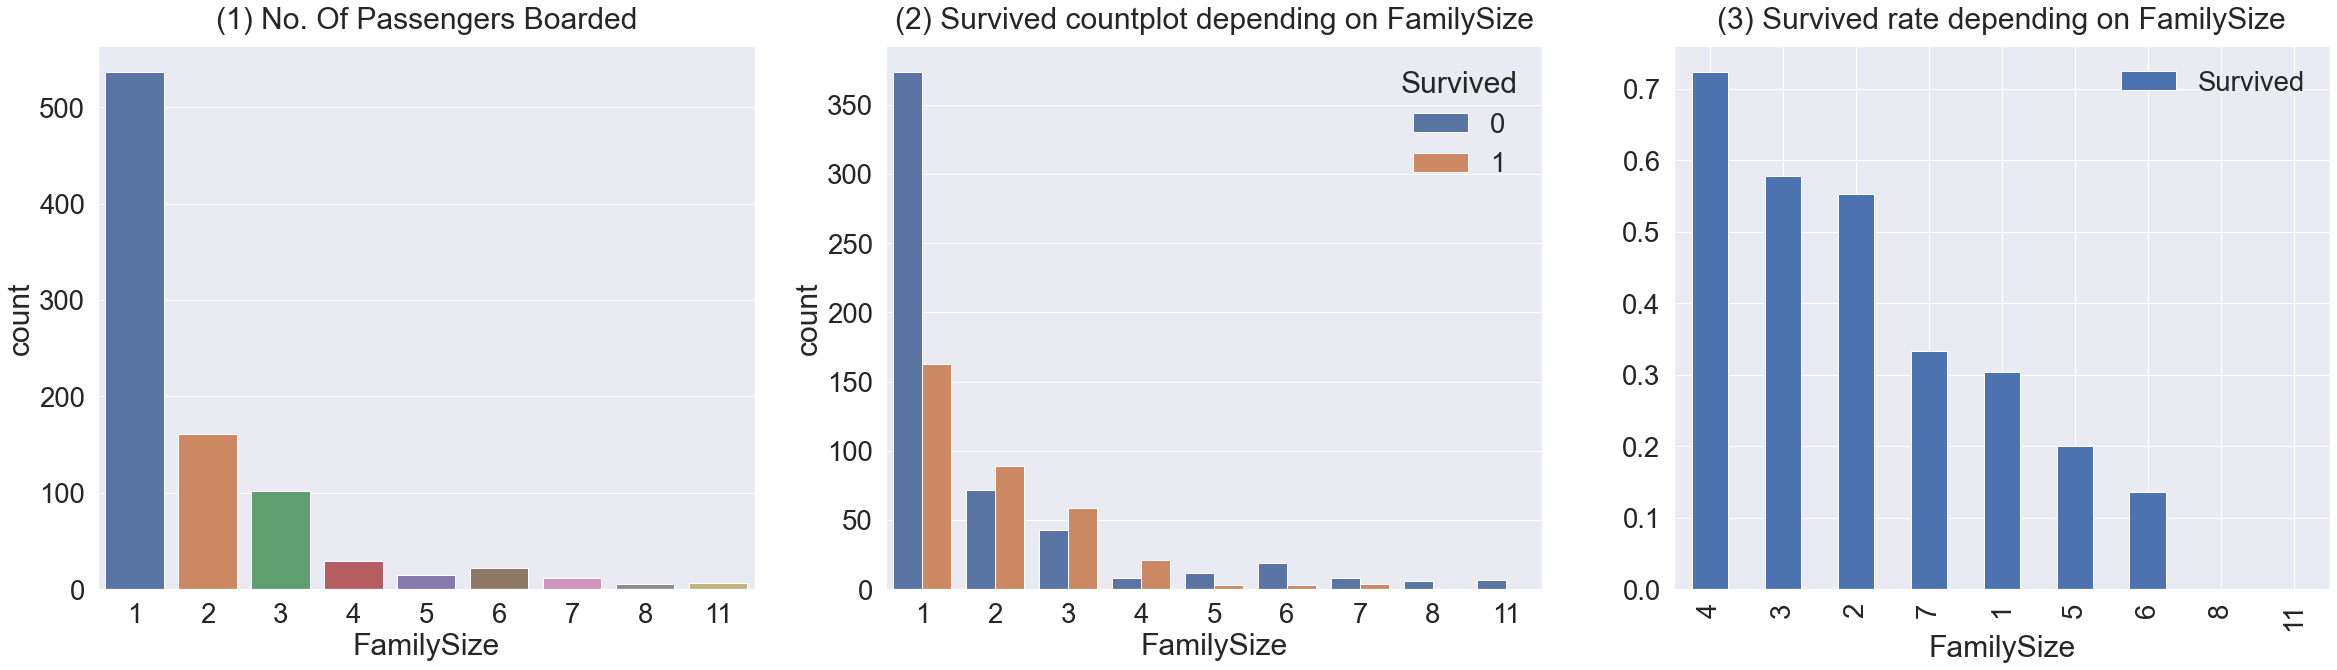

In [56]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) : 가족크기가 1~11까지 있음을 볼 수 있다. 대부분 1명이고 그 다음으로 2, 3, 4명이다.
- Figure (2), (3) : 가족 크기에 따른 생존비교
이다. 가족이 4명인 경우가 가장 생존확률이 높다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아진다. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작다. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있다.

###2.8 Fare

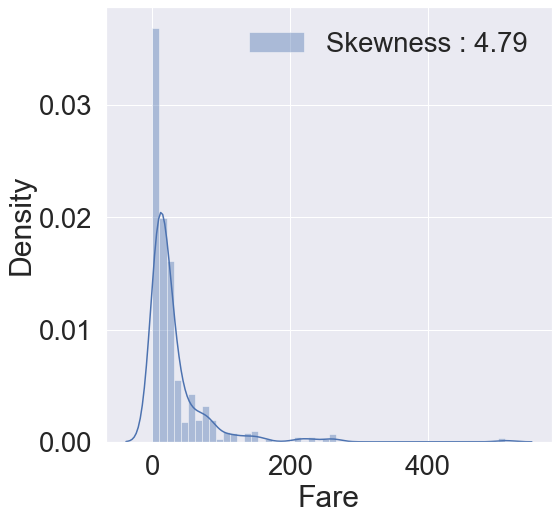

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭인 것을 알 수 있다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있다.
- outlier의 영향을 줄이기 위해 Fare 에 log 를 취한다.
- 여기서 pandas 의 유용한 기능을 사용 dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있다.
- 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 된다. 

In [58]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환한다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

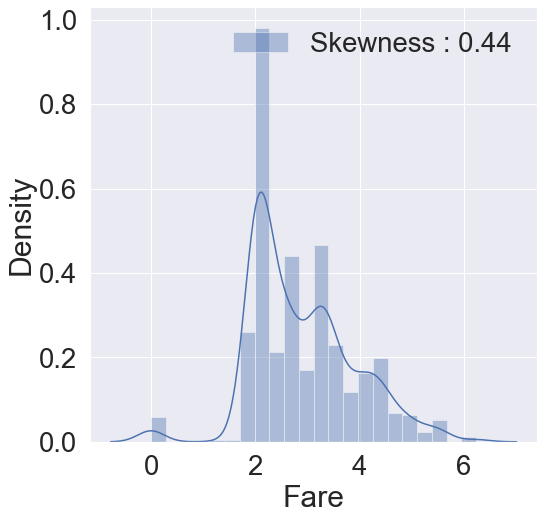

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있다.
- 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
- 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업함.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 한다.

###2.9 Cabin
- 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않다.
- 그러므로 세우려는 모델에 포함시키지 않도록 한다.

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


###2.10 Ticket
- 이 feature 는 NaN 은 없다. 일단 string data 이므로 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요하다.

In [62]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

- ticket number 는 매우 다양, 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까?